In [1]:
import cv2
import torch
import ultralytics
import numpy as np
from PIL import Image
import tensorflow as tf
from ultralytics import YOLO
from deepface import DeepFace
import matplotlib.pyplot as plt

In [2]:
# Load the YOLO face detection model
model = YOLO("face_detection_model.pt")
print("Model loaded successfully!")

Model loaded successfully!


Please enter the path to the image: example_image.jpg


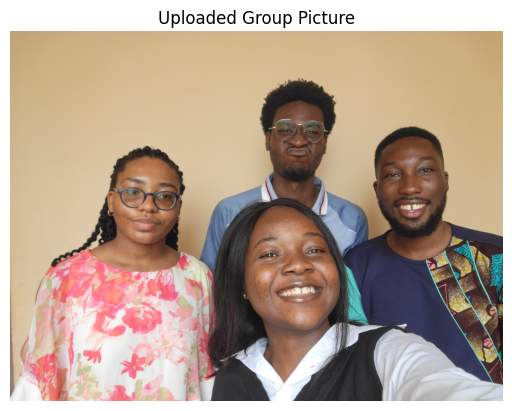

In [3]:
# Load the image
image_path = input("Please enter the path to the image: ")
image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis("off")
plt.title("Uploaded Group Picture")
plt.show()

In [4]:
# Perform detection
results = model(image)

# Get bounding boxes
detections = results[0].boxes  # YOLO format detections
print(f"Detected {len(detections)} faces.")


0: 480x640 4 faces, 233.2ms
Speed: 18.1ms preprocess, 233.2ms inference, 16.0ms postprocess per image at shape (1, 3, 480, 640)
Detected 4 faces.


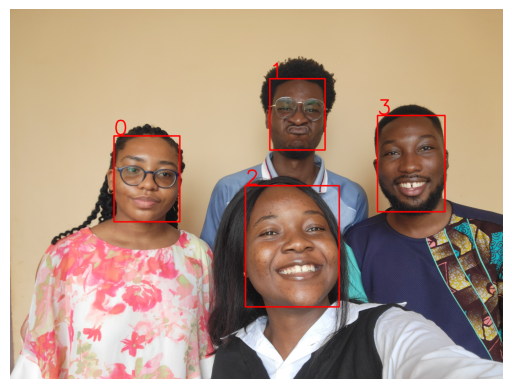

In [5]:
# Load the image
image = cv2.imread(image_path)

# Convert from BGR to RGB for displaying correctly with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Loop through detections and draw bounding boxes with labels
for idx, box in enumerate(detections):
    # Extract the coordinates of the bounding box from the 'xyxy' attribute
    x1, y1, x2, y2 = box.xyxy[0].tolist()

    # Draw the bounding box with a thicker outline
    color = (255, 0, 0)  # Red color in BGR
    thickness = 10
    image_rgb = cv2.rectangle(image_rgb, (int(x1), int(y1)), (int(x2), int(y2)), color, thickness)

    # Label the bounding box with its index
    label = str(idx)  # Use the index as the label
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 5
    font_thickness = 10
    label_position = (int(x1), int(y1) - 10)  # Position the label just above the box
    image_rgb = cv2.putText(image_rgb, label, label_position, font, font_scale, (255, 0, 0), font_thickness)

# Display the image with bounding boxes and labels
plt.imshow(image_rgb)
plt.axis("off")
plt.show()


Enter the index number of the face to select (0 to 3): 0


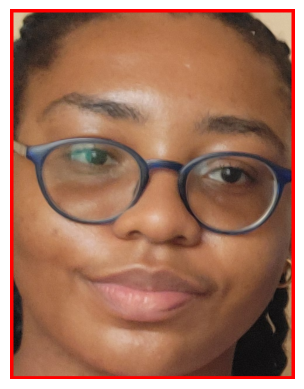

In [6]:
# Convert numpy array to PIL Image
image_pil = Image.fromarray(image_rgb)

# Allow the user to input the index of the face to select
selected_index = int(input(f"Enter the index number of the face to select (0 to {len(detections) - 1}): "))

# Extract coordinates for the selected bounding box
x1, y1, x2, y2 = detections[selected_index].xyxy[0].tolist()

# Crop the face from the image
cropped_face = image_pil.crop((x1, y1, x2, y2))

# Convert the PIL image to a NumPy array
pil_cropped_face = np.array(cropped_face)
cv2.imwrite('cropped_face.jpg', pil_cropped_face)

# Display the cropped face using matplotlib
plt.imshow(cropped_face)
plt.axis('off')  # Hide axes
plt.show()


In [8]:
def verify(ima2_path):
    ima1_path='cropped_face.jpg'
    ima1 = cv2.imread(ima1_path)
    ima2 = cv2.imread(ima2_path)
    
    plt.imshow(ima1[:,:,::-1])
    plt.axis('off')
    plt.show()
    plt.imshow(ima2[:,:,::-1])
    plt.axis('off')
    plt.show()
    
    with tf.device('/CPU:0'):
        output = DeepFace.verify(ima1_path,ima2_path)
        print(output)
        verification = output["verified"]
        if verification:
            print("They are the same")
        else:
            print("They are not the same")

Please enter the path to the image: IMG_5933.jpg


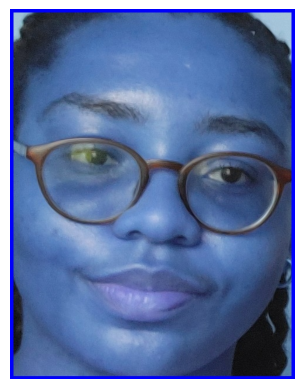

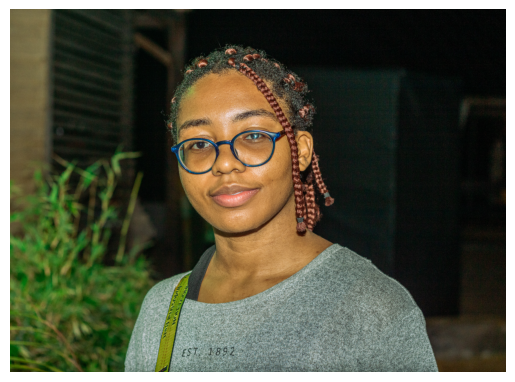

{'verified': True, 'distance': 0.32190720433454345, 'threshold': 0.68, 'model': 'VGG-Face', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 0, 'y': 39, 'w': 487, 'h': 595, 'left_eye': (374, 286), 'right_eye': (142, 251)}, 'img2': {'x': 1485, 'y': 753, 'w': 1720, 'h': 1720, 'left_eye': None, 'right_eye': None}}, 'time': 39.43}
They are the same


In [9]:
image=input("Please enter the path to the image: ")
verify(image)